In [ ]:
# First clone the repo
!git clone https://github.com/Manoj15/BMSIT_ML_Session.git

Cloning into 'BMSIT_ML_Session'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


**Objective**



*   Build a model using automated machine learning package "PyCaret"
*   Track Model Experiments using MLFlow
*   Look into Model Explainability
*   Deploy Model using API



**Problem Statement**

Build a churn model for an e-commerce company using relevant data containing user information and behaviour.

**Data Description**



*   CustomerID : Unique customer ID
*   Churn : Churn Flag
*   Tenure : Tenure of customer in organization
*   PreferredLoginDevice : Preferred login device of customer
*   CityTier : City tier
*   WarehouseToHome : Distance in between warehouse to home of customer
*   PreferredPaymentMode : Preferred payment method of customer
*   Gender : Gender of customer
*   HourSpendOnApp : Number of hours spend on mobile application or website
*   NumberOfDeviceRegistered
Total number of deceives is registered on particular customer
*   PreferedOrderCat : Preferred order category of customer in last month
*   SatisfactionScore : Satisfactory score of customer on service
*   MaritalStatus : Marital status of customer
*   NumberOfAddress : Total number of added added on particular customer
*   Complain : Any complaint has been raised in last month
*   OrderAmountHikeFromlastYear : Percentage increases in order from last year
*   CouponUsed : Total number of coupon has been used in last month
*   OrderCount : Total number of orders has been places in last month
*   DaySinceLastOrder : Day Since last order by customer
*   CashbackAmount : Average cashback in last month

**Code**

In [ ]:
!pip install -r /content/BMSIT_ML_Session/requirements.txt

     |████████████████████████████████| 15.1MB 265kB/s 
     |████████████████████████████████| 266kB 37.5MB/s 
     |████████████████████████████████| 358kB 44.3MB/s 
     |████████████████████████████████| 14.2MB 281kB/s 
     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 747kB 36.4MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 6.8MB 33.4MB/s 
     |████████████████████████████████| 1.4MB 48.1MB/s 
     |████████████████████████████████| 112kB 40.7MB/s 
     |████████████████████████████████| 276kB 52.1MB/s 
     |████████████████████████████████| 256kB 55.8MB/s 
     |████████████████████████████████| 174kB 48.4MB/s 
     |████████████████████████████████| 2.0MB 33.8MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 1.7MB 46.6MB/s 
 

In [ ]:
# Importing packages
import numpy as np
import pandas as pd

# Automated EDA
import sweetviz as sv

# AutoML package
from pycaret.classification import *

In [ ]:
# Read Data
churn_df = pd.read_excel('/content/BMSIT_ML_Session/E_Commerce_Dataset.xlsx', sheet_name='E Comm')
churn_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Some EDA
#analyzing the dataset
churn_report = sv.analyze(churn_df)
#display the report
churn_report.show_html('churn_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report churn_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
churn_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# initializing setup for AutoML
churn_ml_df = setup(data = churn_df, target = 'Churn', ignore_features = ['CustomerID'], log_experiment = True, experiment_name = 'churn_model')

NameError: ignored

In [ ]:
# Run & Compare all baseline models and select top 10
top10 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9452,0.9677,0.7610,0.8845,0.8172,0.7852,0.7888,0.168
rf,Random Forest Classifier,0.9391,0.9709,0.6510,0.9584,0.7741,0.7405,0.7597,0.718
et,Extra Trees Classifier,0.9383,0.9684,0.6400,0.9668,0.7689,0.7351,0.7567,0.716
dt,Decision Tree Classifier,0.9239,0.8625,0.7719,0.7630,0.7665,0.7211,0.7217,0.060
gbc,Gradient Boosting Classifier,0.9074,0.9206,0.5754,0.7941,0.6665,0.6144,0.6256,0.788
lr,Logistic Regression,0.8982,0.8886,0.5235,0.7757,0.6234,0.5672,0.5828,1.127
ada,Ada Boost Classifier,0.8911,0.9082,0.5440,0.7158,0.6162,0.5544,0.5625,0.283
lda,Linear Discriminant Analysis,0.8901,0.8790,0.4968,0.7409,0.5926,0.5321,0.5474,0.109
ridge,Ridge Classifier,0.8817,0.0000,0.3192,0.8583,0.4626,0.4122,0.4773,0.030
knn,K Neighbors Classifier,0.8586,0.8479,0.3869,0.5973,0.4675,0.3906,0.4039,0.159


In [ ]:
## Thanks to https://github.com/XiwangLi/mlflow-colab/blob/master/MLflow.ipynb
get_ipython().system_raw("mlflow ui --port 80 &")# run tracking UI in the background

In [ ]:
!pip install pyngrok --quiet
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 80 for http://localhost:5000
public_url = ngrok.connect(port="80", proto="http", options={"bind_tls": True},  )
print("MLflow Tracking UI:", public_url)

MLflow Tracking UI: NgrokTunnel: "http://20fc43387aa7.ngrok.io" -> "http://localhost:80"


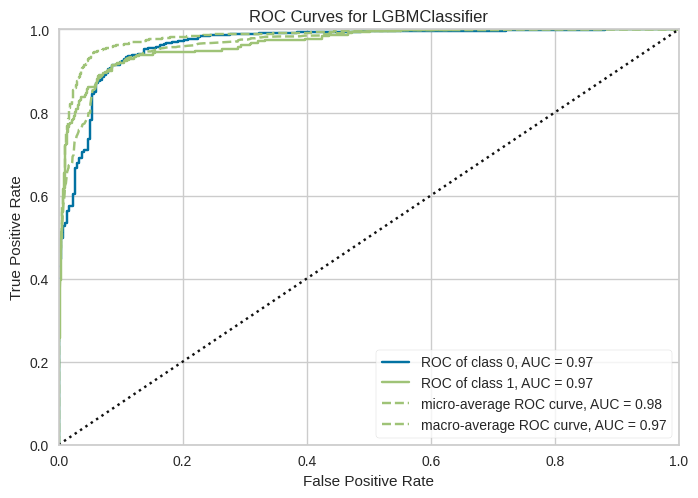

In [ ]:
# Plot Models ROC

plot_model(top10)

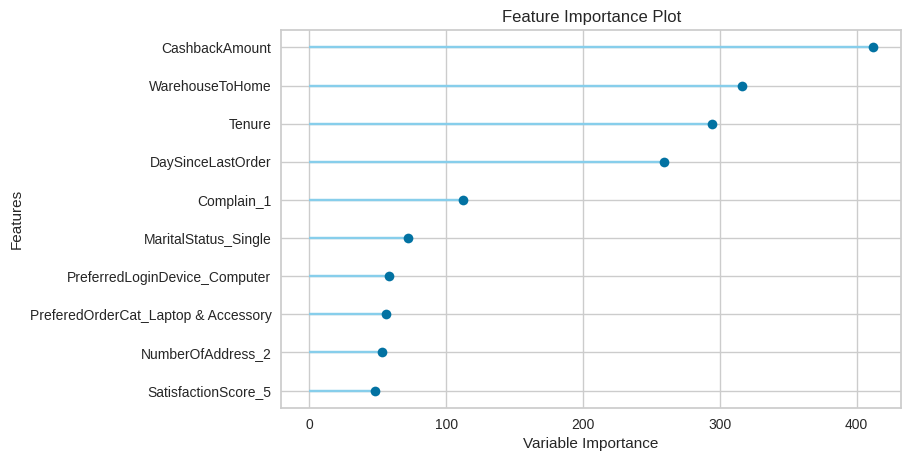

In [ ]:
# check feature importance
plot_model(top10, plot = 'feature')

In [ ]:
# Save Pipeline and Model
# finalize the model
final_best = finalize_model(top10)
# save model to disk
save_model(final_best, 'churn-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['CustomerID'],
                                       id_columns=['CustomerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [ ]:
# API Creation
from fastapi import FastAPI
import uvicorn
import nest_asyncio
nest_asyncio.apply()

# 2. Create the app object
app = FastAPI()

#. Load trained Pipeline
model = load_model('churn-pipeline')

# Define predict function
@app.post('/predict')
def predict(Tenure, PreferredLoginDevice, CityTier,
            WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp,
            NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
            MaritalStatus, NumberOfAddress, Complain,
            OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
            DaySinceLastOrder, CashbackAmount):
    data = pd.DataFrame([[Tenure, PreferredLoginDevice, CityTier,
                          WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp,
                          NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
                          MaritalStatus, NumberOfAddress, Complain,
                          OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
                          DaySinceLastOrder, CashbackAmount]])
    data.columns = ['Tenure', 'PreferredLoginDevice', 'CityTier',
                    'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
                    'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
                    'MaritalStatus', 'NumberOfAddress', 'Complain',
                    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                    'DaySinceLastOrder', 'CashbackAmount']

    predictions = predict_model(model, data=data)
    return {'prediction': int(predictions['Label'][0])}

if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

Transformation Pipeline and Model Successfully Loaded


INFO:     Started server process [64]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [64]


Thanks to Moez Ali (Founder of PyCaret) for providing such an awesome package.
References :

*   https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6
*   https://towardsdatascience.com/build-with-pycaret-deploy-with-fastapi-333c710dc786

